In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# Function to perform symlog transformation
def symlog_transform(values):
    return np.sign(values) * np.log10(np.abs(values) + 1)

# Function to draw ridge plots
def draw_ridge_plots(df, title, y_max=10, y_gap=5):
    unique_tau = sorted(df['tau'].unique())
    norm = mpl.colors.Normalize(vmin=0, vmax=len(unique_tau), clip=True)
    mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.colormaps['viridis'].reversed())

    plt.figure(figsize=(9, 9))
    plt.xlim(0, 1)
    plt.ylim(0, y_max)
    plt.xlabel(r'$\gamma$')
    plt.ylabel('MSE')
    plt.xticks([])
    plt.yticks([])
    
    ax = plt.gca()
    
    gamma_values = [0.1, 0.2, 0.5, 1, 2, 5, 10]
    ax.set_xticks(symlog_transform(gamma_values))
    ax.set_xticklabels(gamma_values)
    ax.set_yticks(np.arange(0, y_max + y_gap, y_gap))

    # Grid
    for val in gamma_values:
        plt.axvline(x=symlog_transform(val), color='grey', linestyle='--')

    # Plot lines for each tau value
    for i, tau_val in enumerate(unique_tau):
        sub_df = df[df['tau'] == tau_val]
        sub_df = sub_df.groupby(by=['transformed_gamma']).mean()
        transformed_gamma = symlog_transform(sub_df['gamma'])
        plt.plot(transformed_gamma, sub_df['MSE'], lw=3, color=mapper.to_rgba(i), label=fr'$log(\tau) = {round(np.log(tau_val), 2)}$')

    plt.title(title)
    plt.legend()
    plt.show()

/tmp/ipykernel_8274/3291452378.py:40: RuntimeWarning: divide by zero encountered in log
  plt.plot(transformed_gamma, sub_df['MSE'], lw=3, color=mapper.to_rgba(i), label=fr'$log(\tau) = {round(np.log(tau_val), 2)}$')


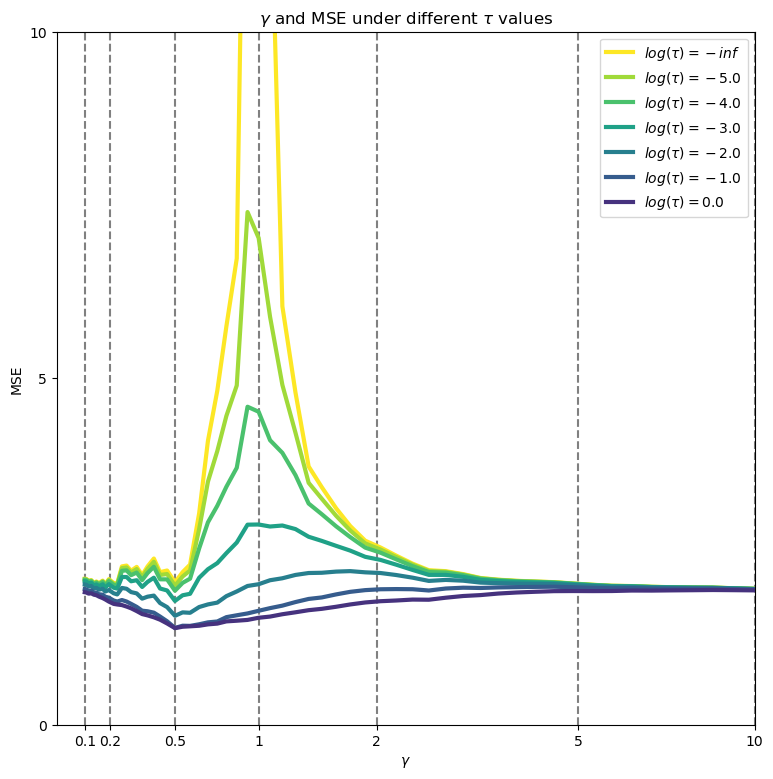

In [55]:
# Load the CSV file
file_path = '../results/Python/ridge_bias_linear_p_100_results_[11-12-2023_10:16:00-1655].csv'
df = pd.read_csv(file_path)

# Rename columns
df.columns = ['lambda', 'mu', 'p', 'true_p', 'n', 'tau', 'snr', 'MSE']

# Compute gamma and transformed_gamma
df['gamma'] = df['p'] / df['n']
df['transformed_gamma'] = df['gamma'].apply(symlog_transform)

# Generate and display the plot
draw_ridge_plots(df, fr'$\gamma$ and MSE under different $\tau$ values')